## The impact of climate change on securities market

## Data Collation and Cleaning

In [1]:
library(dplyr)
library(lubridate)
library(ggplot2)
install.packages("interactions")
library(jtools)
library(interactions)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


also installing the dependencies ‘pander’, ‘jtools’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘interactions’


The following objects are masked from ‘package:jtools’:

    cat_plot, interact_plot, johnson_neyman, probe_interaction,
    sim_slopes




In [2]:
# Change all data in year scale
# 1. Change CPU time scale
cpu_df <- read.csv("data/CPU index.csv")     
# Extract year and month from the Date variable
cpu_df$date <- as.Date(cpu_df$date, format = "%Y/%m/%d")
time_cpu_df <- cpu_df %>%
mutate(Year = year(date))
# change month scale to year scale using mean method 
time_cpu_df_yearly <- time_cpu_df %>%
  group_by(Year) %>%
  summarise(
    Mean_cpu_index = mean(cpu_index)
  )
#time_cpu_df_yearly

In [3]:
# 2. Change SPGC index time scale
SPGC_df <- read.csv("data/S&P Global Clean Energy Index.csv")     
# Extract year and month from the Date variable
SPGC_df$Effective.date <- as.Date(SPGC_df$Effective.date, format = "%Y/%m/%d")
time_SPGC_df <- SPGC_df %>%
mutate(Year = year(Effective.date))
# change day scale to year scale using mean method 
SPGC_df_yearly <- time_SPGC_df %>%
  group_by(Year) %>%
  summarise(
    Mean_SPGC = mean(SPGC.Index)
  )
#head(SPGC_df_yearly)

In [4]:
# 3. Change SPGC index time scale
SPGB_df <- read.csv("data/S&P Green Bond Select Index.csv")     
# Extract year and month from the Date variable
SPGB_df$Effective.date <- as.Date(SPGB_df$Effective.date, format = "%Y/%m/%d")
time_SPGB_df <- SPGB_df %>%
mutate(Year = year(Effective.date))
# change day scale to year scale using mean method 
SPGB_df_yearly <- time_SPGB_df %>%
  group_by(Year) %>%
  summarise(
    Mean_SPGB = mean(SPGB.index)
  )
#head(SPGB_df_yearly)

In [5]:
# 4. Change SPGC index time scale
DJSI_df <- read.csv("data/Dow Jones Sustainability U.S. Composite Index.csv")     
# Extract year and month from the Date variable
DJSI_df$Effective.date <- as.Date(DJSI_df$Effective.date, format = "%Y/%m/%d")
time_DJSI_df <- DJSI_df %>%
mutate(Year = year(Effective.date))
# change day scale to year scale using mean method 
DJSI_df_yearly <- time_DJSI_df %>%
  group_by(Year) %>%
  summarise(
    Mean_DJSI = mean(DJSI)
  )
#head(DJSI_df_yearly)

In [6]:
# Extract Co2 data from dataset
co2_df <- read.csv("data/owid-co2-data.csv")     
extract_co2_df <- co2_df %>%
  filter(
        iso_code == "USA",
        year > 2000,
    ) %>%
    select(
        year, 
        co2,
        coal_co2,
        flaring_co2,
        gas_co2, 
        oil_co2,
    )
colnames(extract_co2_df)[which(colnames(extract_co2_df) == "year")] <- "Year"
extract_co2_df$Year <- as.double(extract_co2_df$Year)
#head(extract_co2_df)

In [9]:
# collecting all data in one file with time(year)
merged_df_1 <- merge(SPGB_df_yearly, SPGC_df_yearly, by = "Year")
merged_df_2 <- merge(merged_df_1, DJSI_df_yearly, by = "Year")
merged_df_3 <- merge(merged_df_2, time_cpu_df_yearly, by = "Year", all = TRUE)
merged_df <- merge(merged_df_3, extract_co2_df, by = "Year")
research_df <- merged_df %>%
   filter(
        Year > 2012
    ) 
research_df


Year,Mean_SPGB,Mean_SPGC,Mean_DJSI,Mean_cpu_index,co2,coal_co2,flaring_co2,gas_co2,oil_co2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,152.1630,663.2452,134.4953,77.56581,5480.926,1720.269,58.840,1410.367,2224.219
2014,154.3385,692.6129,144.2318,83.16744,5528.871,1710.368,64.171,1435.020,2247.448
2015,142.6280,679.9604,149.2746,92.61451,5376.578,1479.001,65.110,1475.993,2285.321
2016,145.0608,555.6238,152.0830,120.71575,5251.757,1347.797,54.557,1481.713,2299.607
2017,149.7245,560.0143,178.6304,169.76555,5210.958,1308.479,59.245,1460.392,2314.675
2018,153.7327,580.2783,201.2271,143.29059,5376.657,1256.202,72.787,1618.720,2365.283
2019,157.3768,663.3823,216.0923,192.00178,5259.144,1070.724,88.383,1673.999,2358.831
2020,166.8483,977.8923,240.6494,218.63418,4715.691,878.973,67.684,1653.678,2049.336
2021,173.9597,1536.4553,317.0802,215.38402,5007.336,1002.300,67.684,1637.038,2233.778


## Data Analysis

Impact of CPU and CO2 emission on the three indices


Call:
lm(formula = Mean_SPGB ~ Mean_cpu_index + co2 + co2:Mean_cpu_index, 
    data = research_df)

Residuals:
      1       2       3       4       5       6       7       8       9 
 1.5573 -0.8106 -1.6728  3.0604 -3.7513  0.5369 -2.9515 -2.9612  6.9927 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)  
(Intercept)        -6.015e+02  2.179e+02  -2.761   0.0398 *
Mean_cpu_index      3.639e+00  9.621e-01   3.782   0.0129 *
co2                 1.357e-01  3.978e-02   3.411   0.0190 *
Mean_cpu_index:co2 -6.441e-04  1.759e-04  -3.662   0.0146 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.381 on 5 degrees of freedom
Multiple R-squared:  0.8793,	Adjusted R-squared:  0.8069 
F-statistic: 12.14 on 3 and 5 DF,  p-value: 0.009857


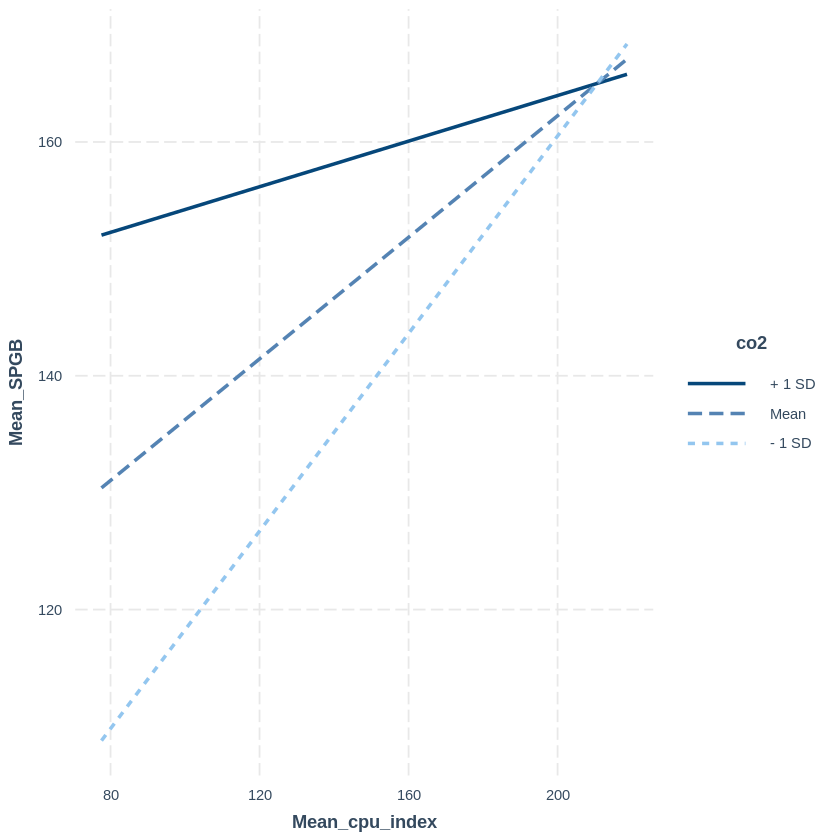

In [10]:
# Regression analysis for the relationship between SPGB index, CPU index and CO2 emission
regression_1 <- lm(Mean_SPGB ~ Mean_cpu_index + co2 + co2:Mean_cpu_index, data = research_df)
summary(regression_1)

interact_plot(regression_1, pred = "Mean_cpu_index", modx = "co2")

#ggplot(research_df, aes(x = Mean_cpu_index, y = Mean_SPGB, color = co2)) +
 # geom_point() +  # Scatter plot of the data points
  #stat_smooth(method = "lm") +
  #labs(title = "Scatter Plot with Regression Line",
   #    x = "CPU index", y = "SPGB index")

In [11]:
regression_2 <- lm(Mean_SPGC ~ Mean_cpu_index + co2 + co2:Mean_cpu_index, data = research_df)
summary(regression_2)


Call:
lm(formula = Mean_SPGC ~ Mean_cpu_index + co2 + co2:Mean_cpu_index, 
    data = research_df)

Residuals:
       1        2        3        4        5        6        7        8 
   8.857  -37.587  139.668   48.432 -161.667 -102.809 -167.720 -223.291 
       9 
 496.118 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)
(Intercept)        -1.359e+04  1.378e+04  -0.986    0.370
Mean_cpu_index      7.762e+01  6.087e+01   1.275    0.258
co2                 2.579e+00  2.516e+00   1.025    0.352
Mean_cpu_index:co2 -1.391e-02  1.113e-02  -1.250    0.267

Residual standard error: 277.2 on 5 degrees of freedom
Multiple R-squared:  0.5159,	Adjusted R-squared:  0.2254 
F-statistic: 1.776 on 3 and 5 DF,  p-value: 0.2679


In [12]:
# Regression analysis for the relationship between DJSI, CPU index and CO2 emission
regression_3 <- lm(Mean_DJSI ~ Mean_cpu_index + co2 + co2:Mean_cpu_index, data = research_df)
summary(regression_3)


Call:
lm(formula = Mean_DJSI ~ Mean_cpu_index + co2 + co2:Mean_cpu_index, 
    data = research_df)

Residuals:
      1       2       3       4       5       6       7       8       9 
 -2.346  -7.441  15.923   4.693 -28.934  10.023 -24.124 -21.361  53.568 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)
(Intercept)        -1.555e+03  1.601e+03  -0.971    0.376
Mean_cpu_index      7.814e+00  7.069e+00   1.105    0.319
co2                 2.943e-01  2.923e-01   1.007    0.360
Mean_cpu_index:co2 -1.241e-03  1.292e-03  -0.960    0.381

Residual standard error: 32.19 on 5 degrees of freedom
Multiple R-squared:  0.814,	Adjusted R-squared:  0.7024 
F-statistic: 7.294 on 3 and 5 DF,  p-value: 0.0283


Impact of CPU and CO2 emission from different fuel types on SPGB


Call:
lm(formula = Mean_SPGB ~ Mean_cpu_index + coal_co2 + coal_co2:Mean_cpu_index, 
    data = research_df)

Residuals:
      1       2       3       4       5       6       7       8       9 
-0.5929  1.7872 -2.2497 -0.3546 -4.4111  5.5460 -2.3759 -3.7313  6.3823 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)  
(Intercept)             26.8954334 46.9500977   0.573   0.5915  
Mean_cpu_index           0.7212312  0.1919901   3.757   0.0132 *
coal_co2                 0.0717497  0.0260032   2.759   0.0399 *
Mean_cpu_index:coal_co2 -0.0004010  0.0001413  -2.838   0.0363 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.884 on 5 degrees of freedom
Multiple R-squared:   0.85,	Adjusted R-squared:  0.7601 
F-statistic: 9.447 on 3 and 5 DF,  p-value: 0.01676


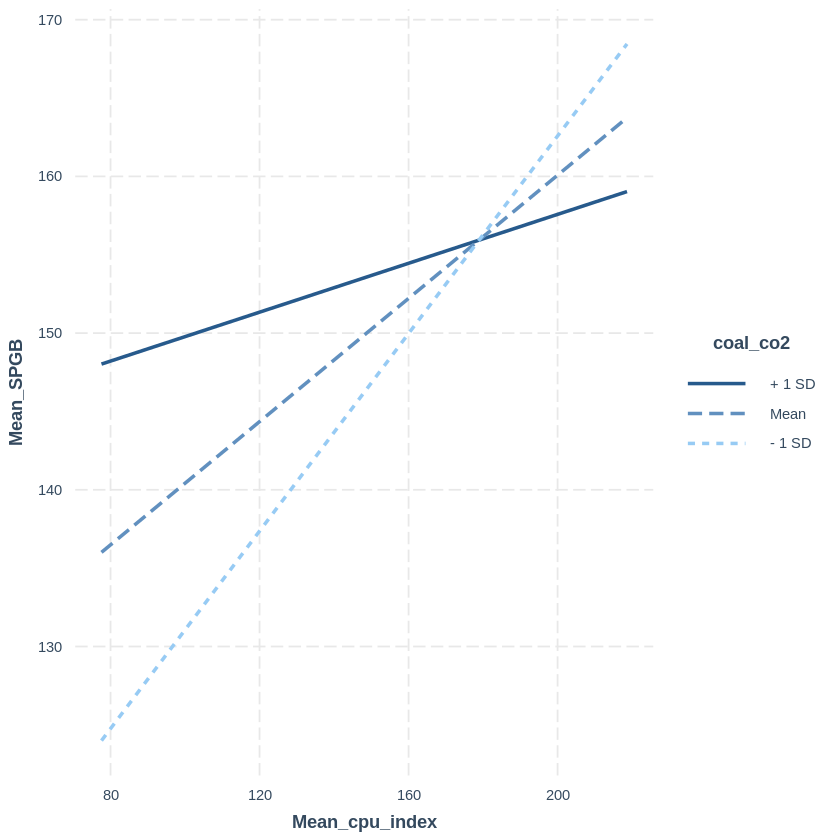

In [13]:
# Regression analysis for the relationship between SPGB index, CPU index and CO2 emission from Coal
regression_4 <- lm(Mean_SPGB ~ Mean_cpu_index + coal_co2 + coal_co2:Mean_cpu_index, data = research_df)
summary(regression_4)
interact_plot(regression_4, pred = "Mean_cpu_index", modx = "coal_co2")


Call:
lm(formula = Mean_SPGB ~ Mean_cpu_index + oil_co2 + oil_co2:Mean_cpu_index, 
    data = research_df)

Residuals:
      1       2       3       4       5       6       7       8       9 
-0.5422  4.7181 -2.6478 -3.4707 -7.2593  6.8306 -2.6657 -1.7220  6.7590 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)
(Intercept)             7.055e+02  3.563e+02   1.980    0.105
Mean_cpu_index         -2.405e+00  1.817e+00  -1.324    0.243
oil_co2                -2.522e-01  1.583e-01  -1.593    0.172
Mean_cpu_index:oil_co2  1.129e-03  8.127e-04   1.389    0.223

Residual standard error: 6.272 on 5 degrees of freedom
Multiple R-squared:  0.7526,	Adjusted R-squared:  0.6042 
F-statistic:  5.07 on 3 and 5 DF,  p-value: 0.05624


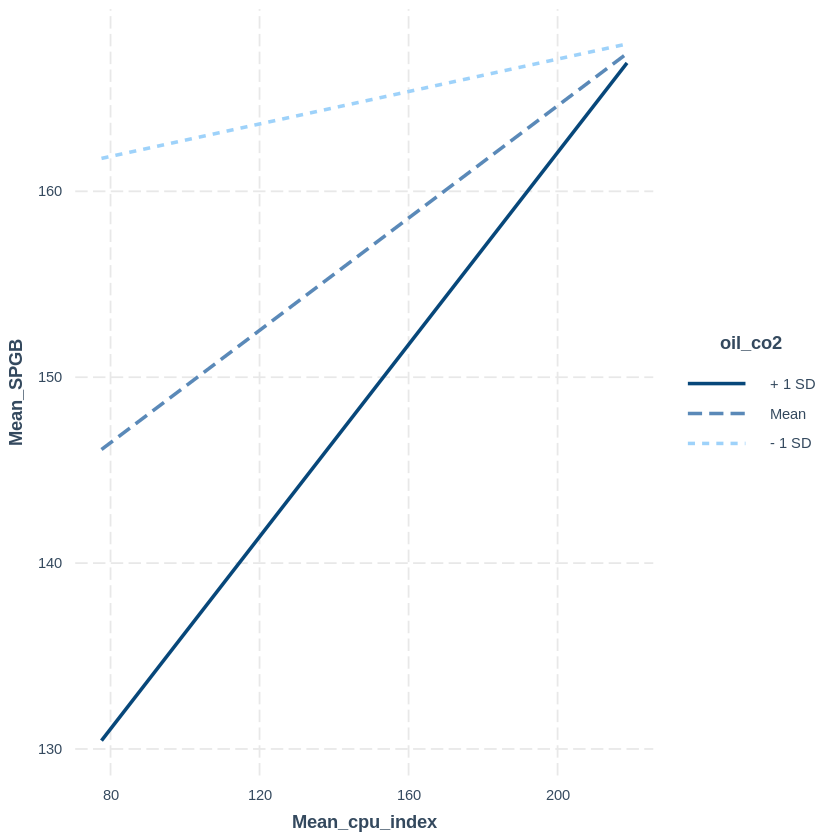

In [14]:
# Regression analysis for the relationship between SPGB index, CPU index and CO2 emission from oil
regression_5 <- lm(Mean_SPGB ~ Mean_cpu_index + oil_co2 + oil_co2:Mean_cpu_index, data = research_df)
summary(regression_5)
interact_plot(regression_5, pred = "Mean_cpu_index", modx = "oil_co2")


Call:
lm(formula = Mean_SPGB ~ Mean_cpu_index + gas_co2 + gas_co2:Mean_cpu_index, 
    data = research_df)

Residuals:
      1       2       3       4       5       6       7       8       9 
 0.1072  4.5125 -4.2831 -3.0829 -0.6758  5.0615 -5.8315 -2.6345  6.8266 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)  
(Intercept)             4.220e+02  1.357e+02   3.109   0.0266 *
Mean_cpu_index         -1.843e+00  8.147e-01  -2.262   0.0732 .
gas_co2                -1.896e-01  9.233e-02  -2.053   0.0952 .
Mean_cpu_index:gas_co2  1.283e-03  5.338e-04   2.403   0.0614 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.689 on 5 degrees of freedom
Multiple R-squared:  0.7965,	Adjusted R-squared:  0.6744 
F-statistic: 6.522 on 3 and 5 DF,  p-value: 0.03518


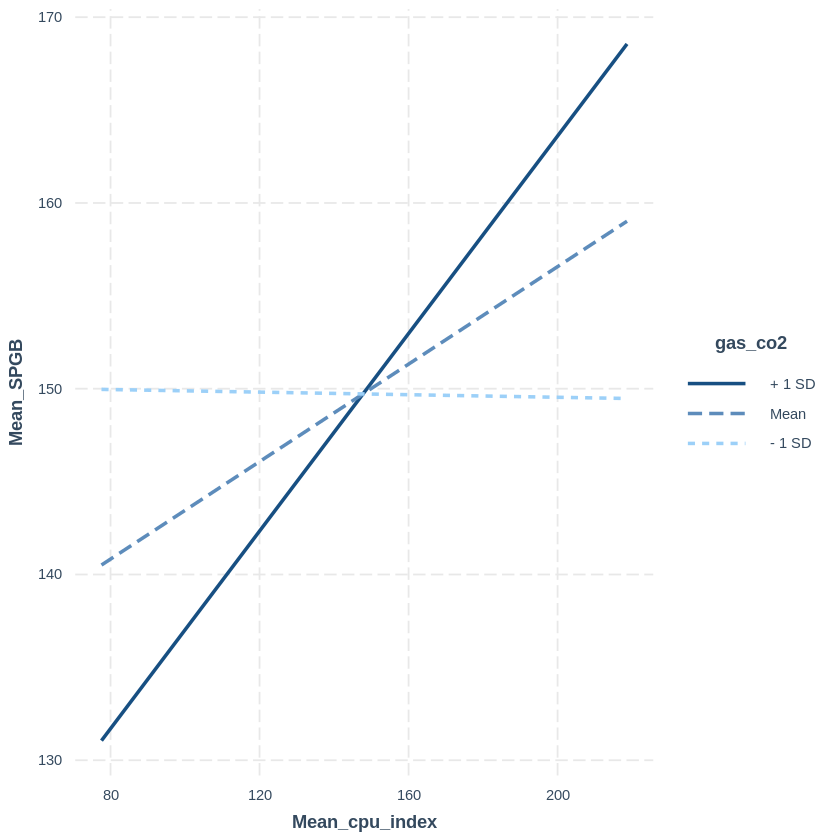

In [15]:
# Regression analysis for the relationship between SPGB index, CPU index and CO2 emission from gas
regression_6 <- lm(Mean_SPGB ~ Mean_cpu_index + gas_co2 + gas_co2:Mean_cpu_index, data = research_df)
summary(regression_6)
interact_plot(regression_6, pred = "Mean_cpu_index", modx = "gas_co2")


Call:
lm(formula = Mean_SPGB ~ Mean_cpu_index + flaring_co2 + flaring_co2:Mean_cpu_index, 
    data = research_df)

Residuals:
      1       2       3       4       5       6       7       8       9 
 6.0036  7.6354 -5.2938 -6.7271 -8.3391 -0.8804 -4.2464  2.1509  9.6968 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)
(Intercept)                 1.407e+02  1.194e+02   1.178    0.292
Mean_cpu_index              9.817e-02  7.012e-01   0.140    0.894
flaring_co2                -7.730e-02  1.889e+00  -0.041    0.969
Mean_cpu_index:flaring_co2  5.251e-04  1.086e-02   0.048    0.963

Residual standard error: 8.422 on 5 degrees of freedom
Multiple R-squared:  0.554,	Adjusted R-squared:  0.2865 
F-statistic: 2.071 on 3 and 5 DF,  p-value: 0.2228


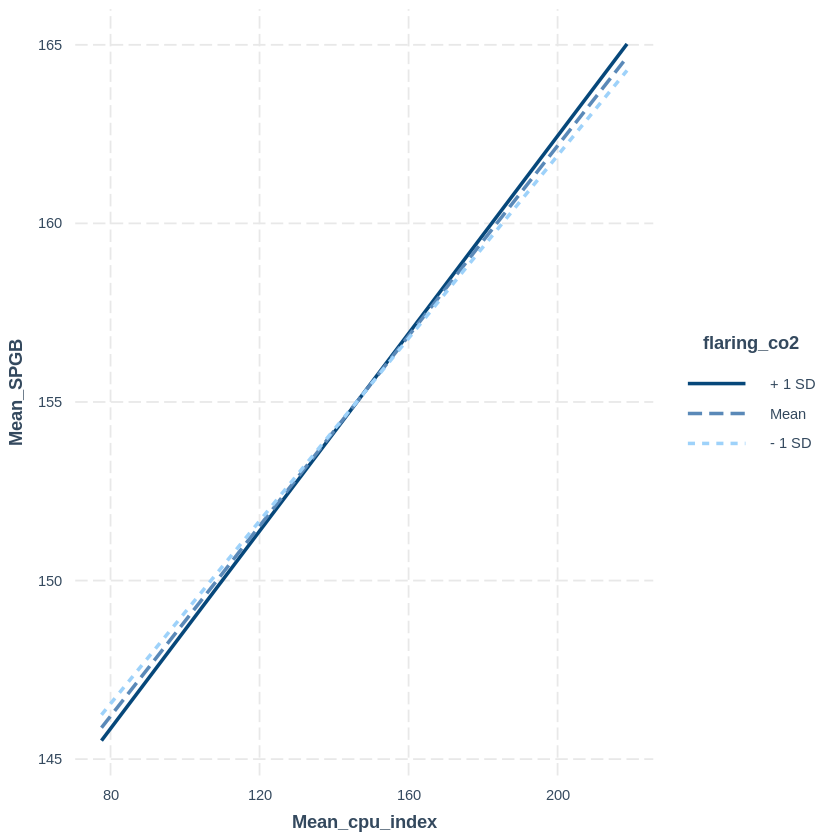

In [16]:
# Regression analysis for the relationship between SPGB index, CPU index and CO2 emission from flaring
regression_7 <- lm(Mean_SPGB ~ Mean_cpu_index + flaring_co2 + flaring_co2:Mean_cpu_index, data = research_df)
summary(regression_7)
interact_plot(regression_7, pred = "Mean_cpu_index", modx = "flaring_co2")